# Deperm Function
## ---------------------------
### Version 1 - Date 14/06/22
### Author: Víctor Vegas Luque - victorvegas24@gmail.com

In [1]:
# Importo NUMPY: una biblioteca que me permite crear matrices y vectores

import numpy as np

# Importo varias librerias que me pertmiten hacer cosas de matematicas y plots.
import math 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from plotly.subplots import make_subplots

# DEPERM FUNCTION

In [194]:
#################
#DEPERM FUNCTION#
#################
#Inputs:
# f : Frequency of the oscilation (in Hz).
# Bmax : Maximum magnetic field applied (in μT).
# t1 : time it takes for the magnetic field increases from 0 to Bmax (in s).
# t2 : time it takes for the magnetic field decreases from Bmax to 0 (in s).
# ts : time our power generator holds each signal (in s).
# Scale : Relation between the magnetic field created an the power our current generator recieves (in V/μT)
#################
#Outputs:
#t : all moments of time where the current generator recieves a signal (in s)
#Bdeperm : magnetic field for every moment of time (in μT).
#Vdeperm : voltage applied to the power generator for every moment of time (in V/μT)
#################
def Deperm(f,Bmax,t1,t2,ts,Scale):
    #We define the total time the deperm is going to be active
    tt=t1+t2
    
    #We define the amount of steps it will take for the magnetic field to fully increase of decrease
    pasos1=math.floor(t1//ts)
    pasos2=math.floor(t2//ts)
    
    #We define the total amount of steps
    pasos=pasos1+pasos2

    #We define t like:
    t=np.zeros(pasos)
    for i in range(0,pasos):
        t[i]=i*ts
        
    #We define the slope of the hull (envolvente), in absolute value:
    m1=Bmax/t1
    m2=Bmax/t2
    
    #We find Bdeperm
    Bdeperm=np.zeros(pasos)
    for i in range(0,pasos1):
        Bdeperm[i]=m1*t[i]*math.sin(2*math.pi*f*t[i])
    #################
    #This is a completly optinal process so that the slope doesn't suddenly change signs in the instant just after t1
    #This process only adds a global '-' to every Bdeperm after t1 if needed.
    #Variables:
    #d1 : Proportional value of the first derivative of B for t<t1 in the limit t->t1
    #d2 : Proportional value of the first derivative of B for t>t1 in the limit t->t1
    #dd1 : Proportional value of the second derivative of B for t<t1 in the limit t->t1
    #dd2 : Proportional value of the second derivative of B for t>t1 in the limit t->t1
    
    d1=math.sin(2*math.pi*f*t[pasos1])+2*math.pi*f*t[pasos1]*math.cos(2*math.pi*f*t[pasos1])
    d2=math.sin(2*math.pi*f*(t[i]))+2*math.pi*f*(t[i]-tt)*math.cos(2*math.pi*f*(t[i]))
    dd1=2*math.pi*t[i]*math.sin(2*math.pi*f*t[i])-2*math.cos(2*math.pi*f*t[pasos1])
    dd2=2*math.cos(2*math.pi*f*(t[i]))-2*math.pi*f*(t[i]-tt)*math.sin(2*math.pi*f*(t[i]))
    if d1<0:
        if d2<0:
            sgn=1
        elif d2>0:
            sgn=-1
        elif dd1<0:
            sgn=1
        else:
            sng=-1
        
    elif d1>0:
        if d2<0:
            sgn=-1
        elif d2>0:
            sgn=1
        elif dd2<0:
            sgn=-1
        else:
            sng=1
    elif dd1<0:
        if d2<0:
            sgn=1
        elif d2>0:
            sgn=-1
        elif dd2<0:
            sgn=1
        else:
            sng=-1
    else:
        if d2<0:
            sgn=-1
        elif d2>0:
            sgn=1
        elif dd2<0:
            sgn=-1
        else:
            sng=1
    #################
    for i in range(pasos1,pasos):
        Bdeperm[i]=sgn*m2*(t[i]-tt)*math.sin(2*math.pi*f*(t[i]))
        
    #We find Vdeperm:
    Vdeperm=Scale*Bdeperm
    return t,Bdeperm,Vdeperm
        

In [195]:
f=1/32
Bmax=5000
t1=200
t2=400
ts=1
Scale=10.0/5000

t,B,V=Deperm(f,Bmax,t1,t2,ts,Scale)


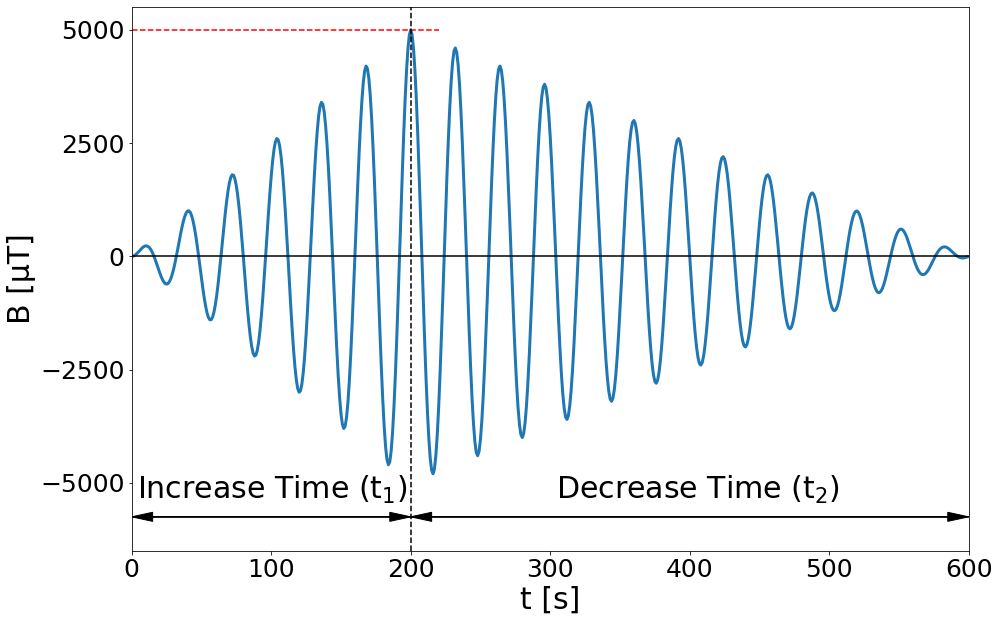

In [196]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)



plt.plot(t, B, '-',linewidth=3)
plt.plot([0,t1*1.1],[Bmax,Bmax],linestyle='dashed',color='r')

plt.xlabel('t [s]',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(np.arange(-Bmax, Bmax+1, Bmax/2))
plt.xlim([0,600])
plt.ylabel('B [μT]',fontsize=30)
plt.yticks(fontsize=25)
plt.axvline(x=t1,color='k',linestyle='dashed')
plt.axhline(y=0,color='k')
plt.ylim([-6500, 5500])

plt.arrow(0,-Bmax*1.15,t1,0,color='k',head_length=15,head_width = 200, width = 7,length_includes_head='true')
plt.arrow(t1,-Bmax*1.15,-t1,0,color='k',head_length=15,head_width = 200, width = 7,length_includes_head='true')

plt.arrow(t1,-Bmax*1.15,t2,0,color='k',head_length=15,head_width = 200, width = 7,length_includes_head='true')
plt.arrow(t1+t2,-Bmax*1.15,-t2,0,color='k',head_length=15,head_width = 200, width = 7,length_includes_head='true')

plt.text(t1/2-96,-Bmax*1.07,'Increase Time (t$_1$)',fontsize=30)
plt.text(t1+t2/2-96,-Bmax*1.07,'Decrease Time (t$_2$)',fontsize=30)

plt.savefig('DepermVictor.png', format='png')

plt.show()

In [1]:
%run -i CountLines.py DePerm.ipynb

CODE LINES
148
